# A study on Grid Trading 

Assume that 
- the price follows GBM with 0 dirft 

We solve:
1. The expected profit of the Grid Trading strategy -> = 0?

In [1]:
from price_dynamic import *
from bt_grid_trading import *
from grid_trading_loss import *
from IPython.utils import io
import matplotlib.pyplot as plt

In [2]:
inputs = {
    "X0": 10000,
    "T": 0.83,
    "mu": 0,
    "sigma": 0.6,
    "N": 1,
    "seed": 1,
    "interval_number": 2592000,
    # Grid trading parameters
    "r": 0.02,
    "n_grid": 4,
}


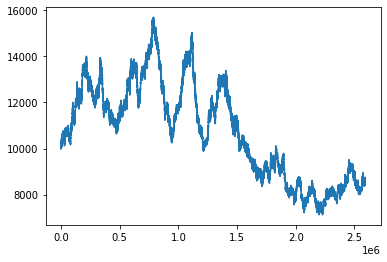

In [3]:
# Price dynamic 
X = geometric_brownien_motion(inputs)

# Plot
plt.figure()
for i in range(1):
    plt.plot(X[i,:])


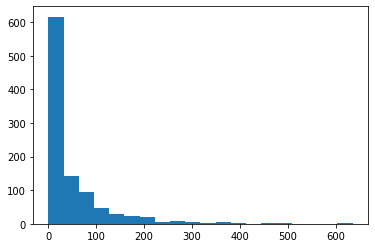

In [4]:
# Calculate the loss in the end 
end_price = X[:, -1]
losses = get_grid_loss_v4(start_price, end_price, r)

# for i in range(10):
#     print(get_grid_loss_v3(start_price, end_price[i], r), losses[i])

fg1 = plt.hist(losses, bins=20)


In [6]:
# Calculate profit in the end
profits = np.zeros(X.shape[0]) 
for i in range(X.shape[0]):
# for i in range(5):
    static_grid_bt = StaticGridBT(
        0,
        inputs["r"],
        inputs["n_grid"],
        "arth",
        pd.Series(X[i, :]),
        is_trading_even=False,
        tx_m=0,
        tx_t=0,
        grid_quantity=0.01,
    )
    
    with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
        static_grid_bt.run_on_bar()

    profits[i] = static_grid_bt.wealth.iloc[-1]

# print(f"final price: {X[:,-1]}")
# print(f"final profits: {profits}")
print(f"final avg profits: {np.mean(profits)}")


final avg profits: 1197.0310777333582


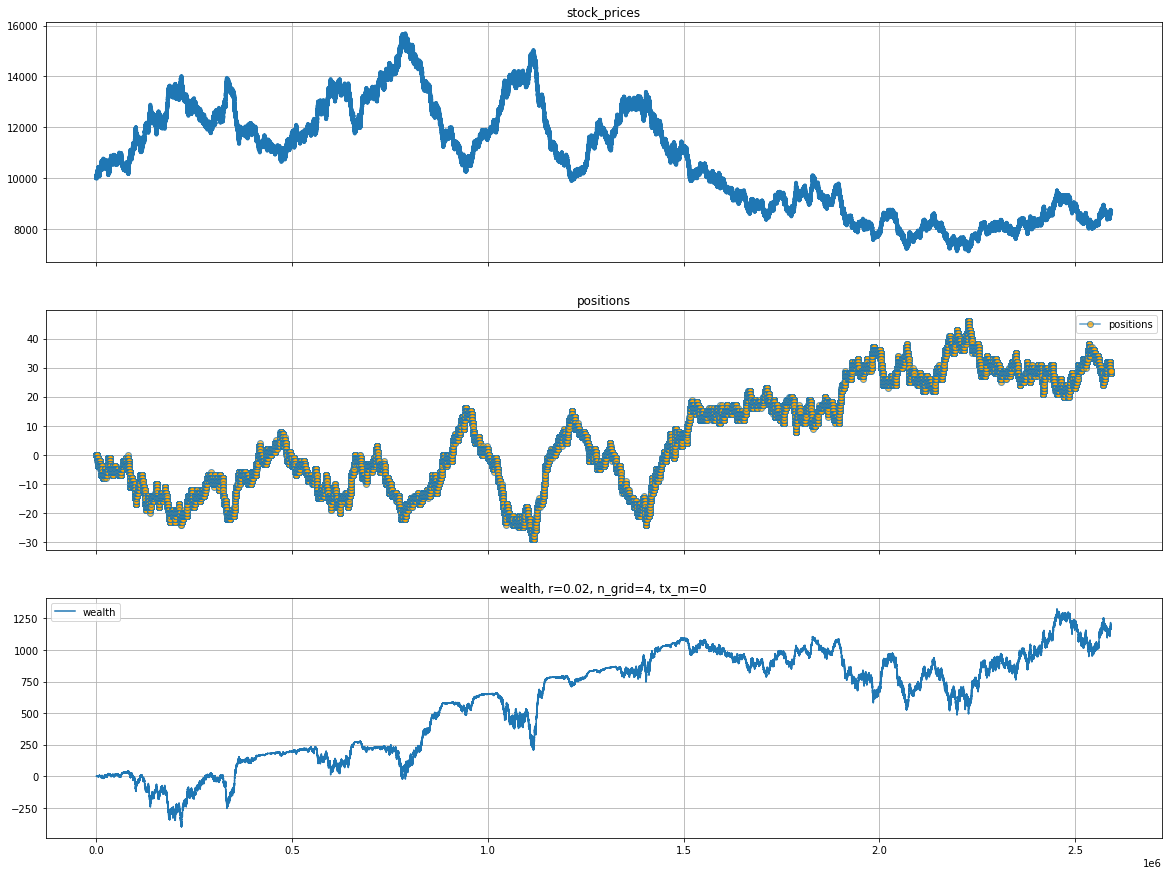

In [7]:
static_grid_bt.plot_results()


In [7]:
profits


array([ 3.72441155e-02, -9.42922378e-01,  2.40000000e-01,  2.78358456e-01,
        2.22727635e-01, -4.87424481e-01,  4.47045149e-02, -3.31467155e-01,
       -4.45574530e-01,  8.68419791e-02,  2.13936241e-01, -4.89683369e-01,
       -1.60582327e+00, -3.23090524e-01, -1.46393646e+00, -5.56157439e-01,
        2.46441841e-01, -2.12516994e-01,  2.14622121e-01, -1.00636815e-01,
        2.49939300e-02,  2.41567684e-01, -4.04745934e-02, -8.30864967e-01,
        1.79233095e-01, -1.76780116e-01,  2.56018489e-03,  1.81285786e-01,
        1.30150542e-01, -3.31199117e-02, -4.87387068e+00, -3.36509604e-01,
        2.09735856e-03,  1.75653031e-01, -2.70107483e-01, -2.77415944e+00,
        8.64018679e-02,  1.47212754e-01,  1.99114583e-01, -2.29673974e-01,
       -2.97801738e-01,  2.39858357e-01, -2.68733828e-01, -3.05275661e-01,
       -3.15523247e-01, -3.10273408e-01, -2.98622921e-01, -7.53595573e-01,
       -5.65356272e-01,  1.15253652e-01,  1.05219074e-01,  2.80070827e-01,
       -8.56139868e-02, -

(array([  1.,   2.,   3.,   3.,   9.,  14.,  33.,  82., 239., 614.]),
 array([-6.25337981, -5.57380981, -4.8942398 , -4.2146698 , -3.53509979,
        -2.85552979, -2.17595978, -1.49638977, -0.81681977, -0.13724976,
         0.54232024]),
 <BarContainer object of 10 artists>)

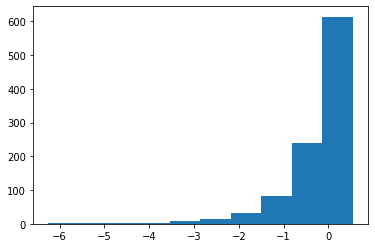

In [8]:
# plt.hist(profits[profits !=0], bins=10)
plt.hist(profits[profits !=0], bins=10)

